In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import scale, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.spatial.transform import Rotation as R

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

2023-07-11 11:34:30.586389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 11:34:30.668704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 11:34:30.670526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 11:34:32.682455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gestures = ['rectangle', 'delete_mark', 'pigtail']
data = []
labels = []

for root, subdirs, files in os.walk('dataset/xml_logs'):
    if 'ipynb_checkpoint' in root:
        continue
        
    if len(files) > 0:
        for f in files:
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                    
                xml_root = ET.parse(f'{root}/{f}').getroot()
                    
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                        
                points = np.array(points, dtype=float)
                    
                # scaler = StandardScaler()
                # points = scaler.fit_transform(points)
                    
                #resampled = resample(points, 64)
                    
                if not label in labels and label in gestures:
                    data.append((label, points))
                    labels.append(label)

                if len(labels) == len(gestures):
                    print("all files loaded successfully", len(data))
                    break

print("all files loaded successfully", len(data))


all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all file

In [3]:
# labels = [sample[0] for sample in data]
# print(set(labels))

# encoder = LabelEncoder()
# labels_encoded = encoder.fit_transform(labels)

# print(set(labels_encoded))
# y = to_categorical(labels_encoded)
# print(len(y[0]))

# sequences = [sample[1] for sample in data]
# X = np.array(sequences)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [4]:
def add_noise(sequence):
    noise = np.random.normal(0,0.08,sequence.shape)
    noise_seq = sequence + noise
    return noise_seq

In [5]:
def scaling(sequence):
    centroid = np.mean(sequence)
    rnd_x = np.random.uniform(0.8, 1.2)
    rnd_y = np.random.uniform(0.8, 1.2)
    points = sequence - centroid
    scaled_seq=[]
    for x, y in points:
        scaled_x = x*rnd_x
        scaled_y = y*rnd_y 
        scaled_seq.append([scaled_x,scaled_y])
    scaled_seq += centroid
    return scaled_seq

In [6]:
def spatial_resampling(sequence):
    resampled_seq = resample(sequence, np.random.randint(5, len(sequence)*2))
    return resampled_seq

In [7]:
def perspective_change(sequence):
    persp_seq = []
    centroid = np.mean(sequence)
    angle = np.random.uniform(-30, 30)
    r = R.from_euler('yx', [angle, angle], degrees=True)
    sequence = sequence - centroid
    for point in sequence:
        point=np.append(point, 1)
        new_point = np.array(r.as_matrix() @ point)
        persp_seq.append(new_point[:-1]) 
    persp_seq += centroid
    return persp_seq

In [8]:
def skip_frames(sequence):
    skipped_seq = []
    for point in sequence:
        if np.random.uniform(high=1.0) >= 0.8:
            skipped_seq.append(point)
    return np.asarray(skipped_seq)

In [9]:
def rotate(sequence):
    centroid = np.mean(sequence)
    points = sequence - centroid
    angle = np.random.randint(0, high=359)
    print(f'Angle: {angle}')
    r = R.from_euler('z', angle, degrees=True)
    mat = r.as_matrix()
    print(mat)
    points_transformed = []
    for p in points:
        p = np.append(p, 1)
        result = np.array(mat @ p)
        result /= result[2]
        points_transformed.append(result[:-1])
    points_transformed += centroid
    return points_transformed

Angle: 112
[[-0.37460659 -0.92718385  0.        ]
 [ 0.92718385 -0.37460659  0.        ]
 [ 0.          0.          1.        ]]


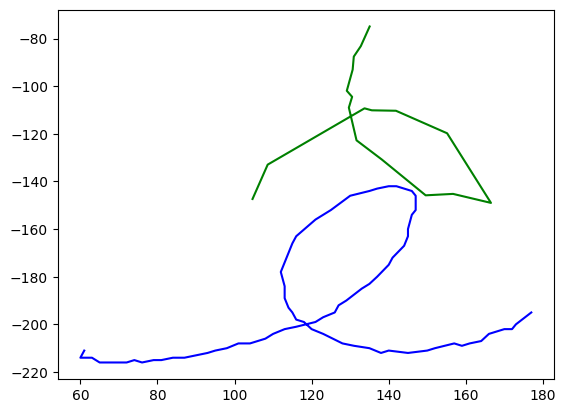

In [10]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]

noise_seq = add_noise(sequence)
skipped_seq = skip_frames(noise_seq)
resampled_seq = spatial_resampling(skipped_seq)
persp_seq = perspective_change(resampled_seq)
rotated_seq = rotate(persp_seq)
scaled_seq = scaling(rotated_seq)


plt.plot(sequence.T[0], sequence.T[1]*-1, 'b')
plt.plot(scaled_seq.T[0], scaled_seq.T[1]*-1, 'g')
